In [125]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,RobustScaler

from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score

from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [71]:
df = pd.read_csv("/kaggle/input/bank-marketing/bank-additional-full.csv",sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

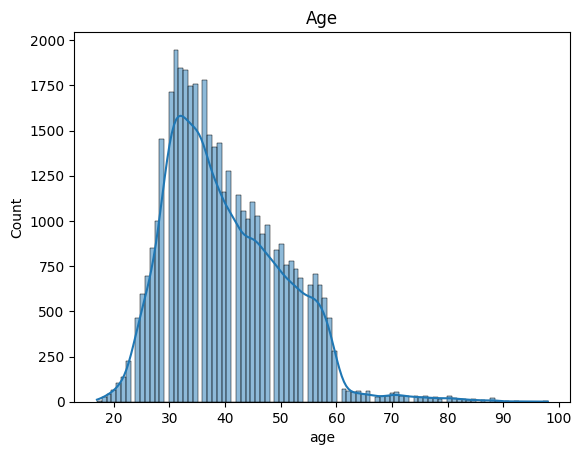

In [73]:
sns.histplot(df['age'], kde=True)
plt.title('Age')
plt.show()

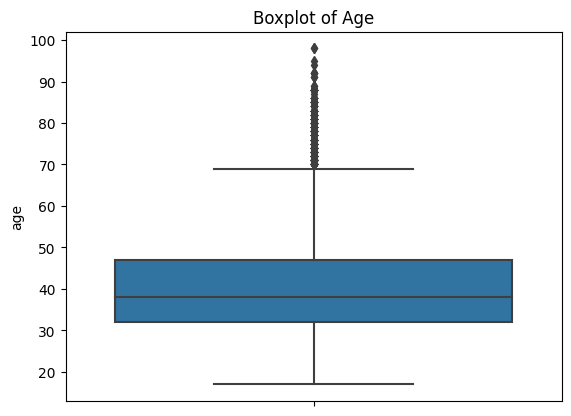

In [74]:
sns.boxplot(y=df['age'])
plt.title('Boxplot of Age')
plt.show()

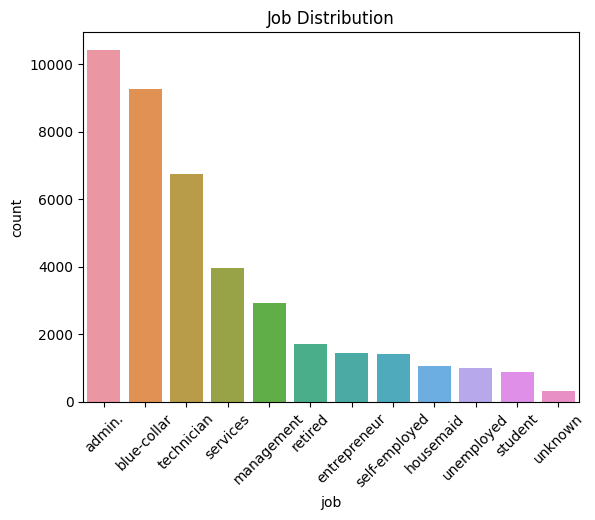

In [75]:
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

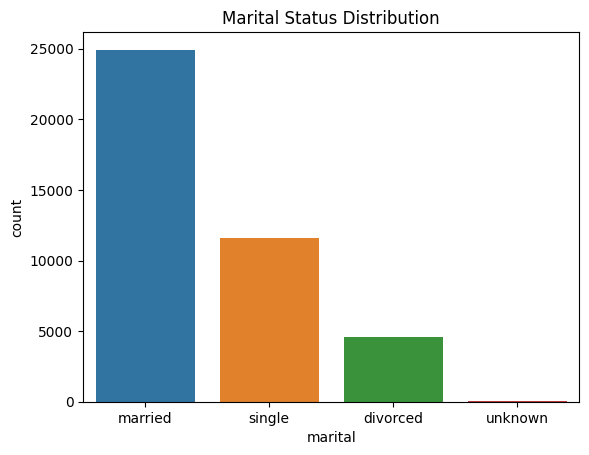

In [76]:
sns.countplot(data=df, x='marital')
plt.title('Marital Status Distribution')
plt.show()

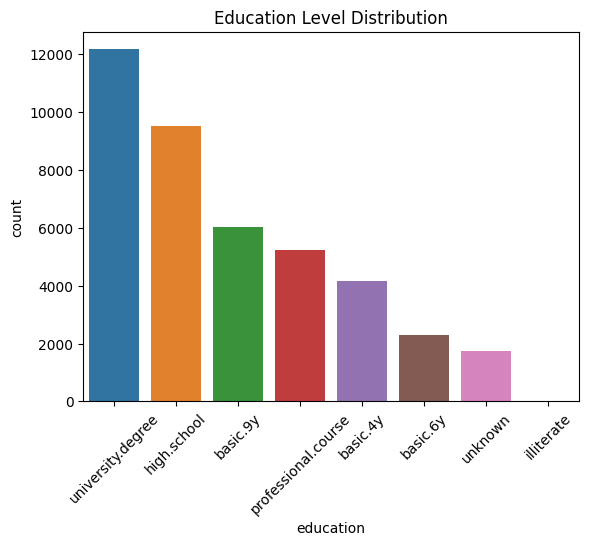

In [77]:
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

In [78]:
df[df._get_numeric_data().columns].corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


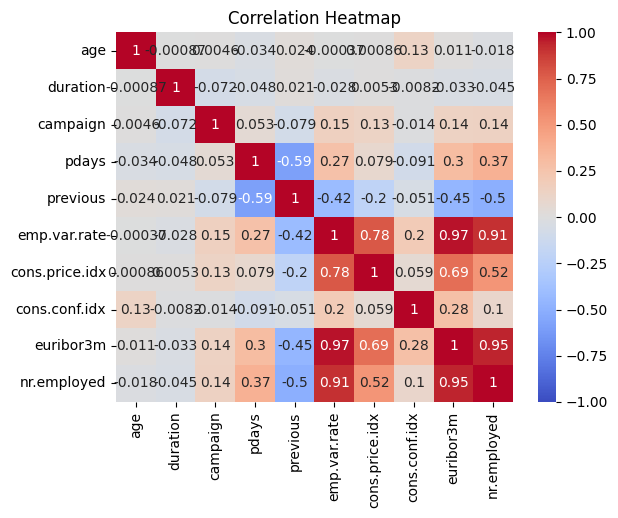

In [79]:
sns.heatmap(df[df._get_numeric_data().columns].corr(), annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [80]:
df.drop(['emp.var.rate','nr.employed'],axis = 1,inplace=True)

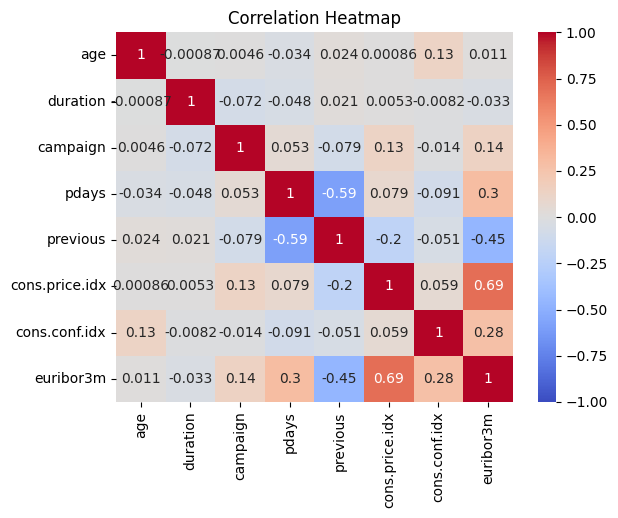

In [81]:
sns.heatmap(df[df._get_numeric_data().columns].corr(), annot=True, cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [82]:
df['target'] = df['y'].apply(lambda x: 0 if x=='no' else 1)
df.drop('y',axis = 1,inplace=True)

In [83]:
def preprocess_data(df):
    
    cat_cols = df.select_dtypes(include=['O']).columns
    num_cols = df._get_numeric_data().columns
    
    ohe=OneHotEncoder(drop='first')
    ohe.fit(df[cat_cols])
    matrix = ohe.transform(df[cat_cols]).toarray()

    matrix_df = pd.DataFrame(matrix,columns = ohe.get_feature_names_out())

    df = df.drop(cat_cols,axis=1)

    df.index = range(df.shape[0])
    matrix_df.index = range(matrix_df.shape[0])

    df = pd.concat([df,matrix_df],axis=1)
    
    
    rs=RobustScaler()
    rs.fit(df[num_cols])
    matrix = rs.transform(df[num_cols])


    matrix_df = pd.DataFrame(matrix,columns = rs.get_feature_names_out())

    df = df.drop(num_cols,axis=1)

    df.index = range(df.shape[0])
    matrix_df.index = range(matrix_df.shape[0])

    df = pd.concat([df,matrix_df],axis=1)
    
    return df

In [84]:
df = preprocess_data(df)

In [85]:
df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,target
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.200000,0.373272,-0.5,0.0,0.0,0.266594,0.857143,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.266667,-0.142857,-0.5,0.0,0.0,0.266594,0.857143,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,-0.066667,0.211982,-0.5,0.0,0.0,0.266594,0.857143,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.133333,-0.133641,-0.5,0.0,0.0,0.266594,0.857143,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.200000,0.585253,-0.5,0.0,0.0,0.266594,0.857143,0.0,0.0


In [86]:
df['target'].value_counts()

target
0.0    36548
1.0     4640
Name: count, dtype: int64

In [87]:
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df.drop('target',axis=1), df['target'])
y_resampled.value_counts()

target
0.0    4640
1.0    4640
Name: count, dtype: int64

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.20,stratify=y_resampled,random_state=42)

# SVM

In [89]:
svm = SVC(C = 0.1,gamma=0.1)
svm.fit(X_train,y_train)

SVC(C=0.1, gamma=0.1)

In [90]:
print(classification_report(svm.predict(X_train),y_train))

              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87      3311
         1.0       0.93      0.84      0.89      4113

    accuracy                           0.88      7424
   macro avg       0.88      0.88      0.88      7424
weighted avg       0.89      0.88      0.88      7424



In [91]:
print(classification_report(svm.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       838
         1.0       0.93      0.85      0.89      1018

    accuracy                           0.89      1856
   macro avg       0.89      0.89      0.89      1856
weighted avg       0.89      0.89      0.89      1856



# Random Forest

In [92]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
print(classification_report(rf.predict(X_train),y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3712
         1.0       1.00      1.00      1.00      3712

    accuracy                           1.00      7424
   macro avg       1.00      1.00      1.00      7424
weighted avg       1.00      1.00      1.00      7424



In [94]:
print(classification_report(rf.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       851
         1.0       0.93      0.86      0.90      1005

    accuracy                           0.89      1856
   macro avg       0.89      0.89      0.89      1856
weighted avg       0.90      0.89      0.89      1856



# Light Gbm

In [95]:
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)

LGBMClassifier()

In [96]:
print(classification_report(lgb.predict(X_train),y_train))

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      3414
         1.0       0.98      0.90      0.94      4010

    accuracy                           0.94      7424
   macro avg       0.94      0.94      0.94      7424
weighted avg       0.94      0.94      0.94      7424



In [97]:
print(classification_report(lgb.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       838
         1.0       0.94      0.86      0.90      1018

    accuracy                           0.90      1856
   macro avg       0.90      0.90      0.90      1856
weighted avg       0.90      0.90      0.90      1856



In [98]:
# Model Tuning

In [101]:
params = {'C': [0.1,0.01,1,10],
          'gamma':[0.1,0.01,1,10]}
svm_tuning = GridSearchCV(svm,params,cv=5,verbose=2)
svm_tuning.fit(X_train,y_train)
svm_tuning.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.7s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.8s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=   1.8s
[CV] END .....................................C=0.1, gamma=1; total time=   3.2s
[CV] END .....................................C=

{'C': 1, 'gamma': 0.1}

In [102]:
svm_tuned = SVC(C= svm_tuning.best_params_['C'],
                gamma = svm_tuning.best_params_['gamma'])
svm_tuned.fit(X_train,y_train)
print(classification_report(svm_tuned.predict(X_train),y_train))
print(classification_report(svm_tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      3303
         1.0       0.96      0.86      0.91      4121

    accuracy                           0.90      7424
   macro avg       0.90      0.90      0.90      7424
weighted avg       0.91      0.90      0.90      7424

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       828
         1.0       0.95      0.86      0.90      1028

    accuracy                           0.89      1856
   macro avg       0.89      0.90      0.89      1856
weighted avg       0.90      0.89      0.89      1856



In [105]:
params = {
    'max_depth': [5, 10],
    'min_samples_leaf': [5, 10],
    'n_estimators': [100, 200]
}
rf_tuning = GridSearchCV(rf,params,cv=5,verbose=2)
rf_tuning.fit(X_train,y_train)
rf_tuning.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.5s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=   0.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   1.1s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time=   1.1s
[CV] END .max_depth=5, min_samples_leaf=10, n_estimators=100; total time=   0.6s
[CV] END .max_depth=5, min_samples_leaf=10, n_est

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}

In [106]:
rf_tuned = RandomForestClassifier(max_depth = rf_tuning.best_params_['max_depth'],
                                  min_samples_leaf = rf_tuning.best_params_['min_samples_leaf'],
                                  n_estimators = rf_tuning.best_params_['n_estimators'])
rf_tuned.fit(X_train,y_train)
print(classification_report(rf_tuned.predict(X_train),y_train))
print(classification_report(rf_tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      3289
         1.0       0.96      0.86      0.90      4135

    accuracy                           0.90      7424
   macro avg       0.90      0.90      0.90      7424
weighted avg       0.91      0.90      0.90      7424

              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       827
         1.0       0.95      0.86      0.90      1029

    accuracy                           0.90      1856
   macro avg       0.90      0.90      0.90      1856
weighted avg       0.90      0.90      0.90      1856



In [120]:
params = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
}
lgb_tuning = GridSearchCV(lgb,params,cv=5,verbose=2)
lgb_tuning.fit(X_train,y_train)
lgb_tuning.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=15; total time=   0.3s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=15; total time=   0.2s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=15; total time=   0.2s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=15; total time=   0.2s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=15; total time=   0.3s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   0.4s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   0.5s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   0.4s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   0.5s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=31; total time=   0.4s
[CV] END .learning_rate=0.01, n_estimators=50, num_leaves=50; total time=   0.6s
[CV] END .learning_rate=0.01, n_estimators=50, 

{'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 31}

In [121]:
rf_tuning.best_params_

{'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 31}

In [122]:
lgb_tuned = LGBMClassifier(num_leaves = lgb_tuning.best_params_['num_leaves'],
                                  learning_rate = lgb_tuning.best_params_['learning_rate'],
                                  n_estimators = lgb_tuning.best_params_['n_estimators'])
lgb_tuned.fit(X_train,y_train)
print(classification_report(lgb_tuned.predict(X_train),y_train))
print(classification_report(lgb_tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3356
         1.0       0.97      0.88      0.92      4068

    accuracy                           0.92      7424
   macro avg       0.92      0.92      0.92      7424
weighted avg       0.92      0.92      0.92      7424

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       842
         1.0       0.95      0.86      0.90      1014

    accuracy                           0.90      1856
   macro avg       0.90      0.90      0.90      1856
weighted avg       0.90      0.90      0.90      1856



In [123]:
# Final Model: Light gbm

In [124]:
lgb_tuned = LGBMClassifier(num_leaves = lgb_tuning.best_params_['num_leaves'],
                                  learning_rate = lgb_tuning.best_params_['learning_rate'],
                                  n_estimators = lgb_tuning.best_params_['n_estimators'])
lgb_tuned.fit(X_train,y_train)
print(classification_report(lgb_tuned.predict(X_train),y_train))
print(classification_report(lgb_tuned.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      3356
         1.0       0.97      0.88      0.92      4068

    accuracy                           0.92      7424
   macro avg       0.92      0.92      0.92      7424
weighted avg       0.92      0.92      0.92      7424

              precision    recall  f1-score   support

         0.0       0.85      0.94      0.89       842
         1.0       0.95      0.86      0.90      1014

    accuracy                           0.90      1856
   macro avg       0.90      0.90      0.90      1856
weighted avg       0.90      0.90      0.90      1856



In [126]:
print('Accuracy score for train set:',accuracy_score(lgb_tuned.predict(X_train),y_train))
print('Accuracy score for train set:',accuracy_score(lgb_tuned.predict(X_test),y_test))

Accuracy score for train set: 0.9175646551724138
Accuracy score for train set: 0.8987068965517241


In [127]:
print('Precision score for train set:',precision_score(lgb_tuned.predict(X_train),y_train))
print('Precision score for train set:',precision_score(lgb_tuned.predict(X_test),y_test))

Precision score for train set: 0.9655172413793104
Precision score for train set: 0.9450431034482759


In [128]:
print('Recall score for train set:',recall_score(lgb_tuned.predict(X_train),y_train))
print('Recall score for train set:',recall_score(lgb_tuned.predict(X_test),y_test))

Recall score for train set: 0.8810226155358899
Recall score for train set: 0.8648915187376726
